<a href="https://colab.research.google.com/github/xDanilog27/Bussiness-Inteligent/blob/main/Reto_3_Modelos_de_Agrupamiento_(Aprendizaje_No_Supervisado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Clusterización o Agrupamiento K-means**

Objetivo: Agrupar solicitantes de credito por sus variables Age, Income, Years, Hours en 5 grupos (Muy bajo, bajo, medio, alta y muy alta). La variable explicada sera Credit Card.


0. Se cargan las librerias de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

1. se cargan los datos

,Age,Income,Years,Hours,CreditCard
0,40,139,3,25,1
1,26,138,7,4,1
2,48,138,7,8,1
3,60,138,6,29,0
4,21,137,5,21,0
...,...,...,...,...,...
395,36,65,8,2,1
396,64,65,7,18,1
397,35,65,7,21,0
398,25,64,9,3,1


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


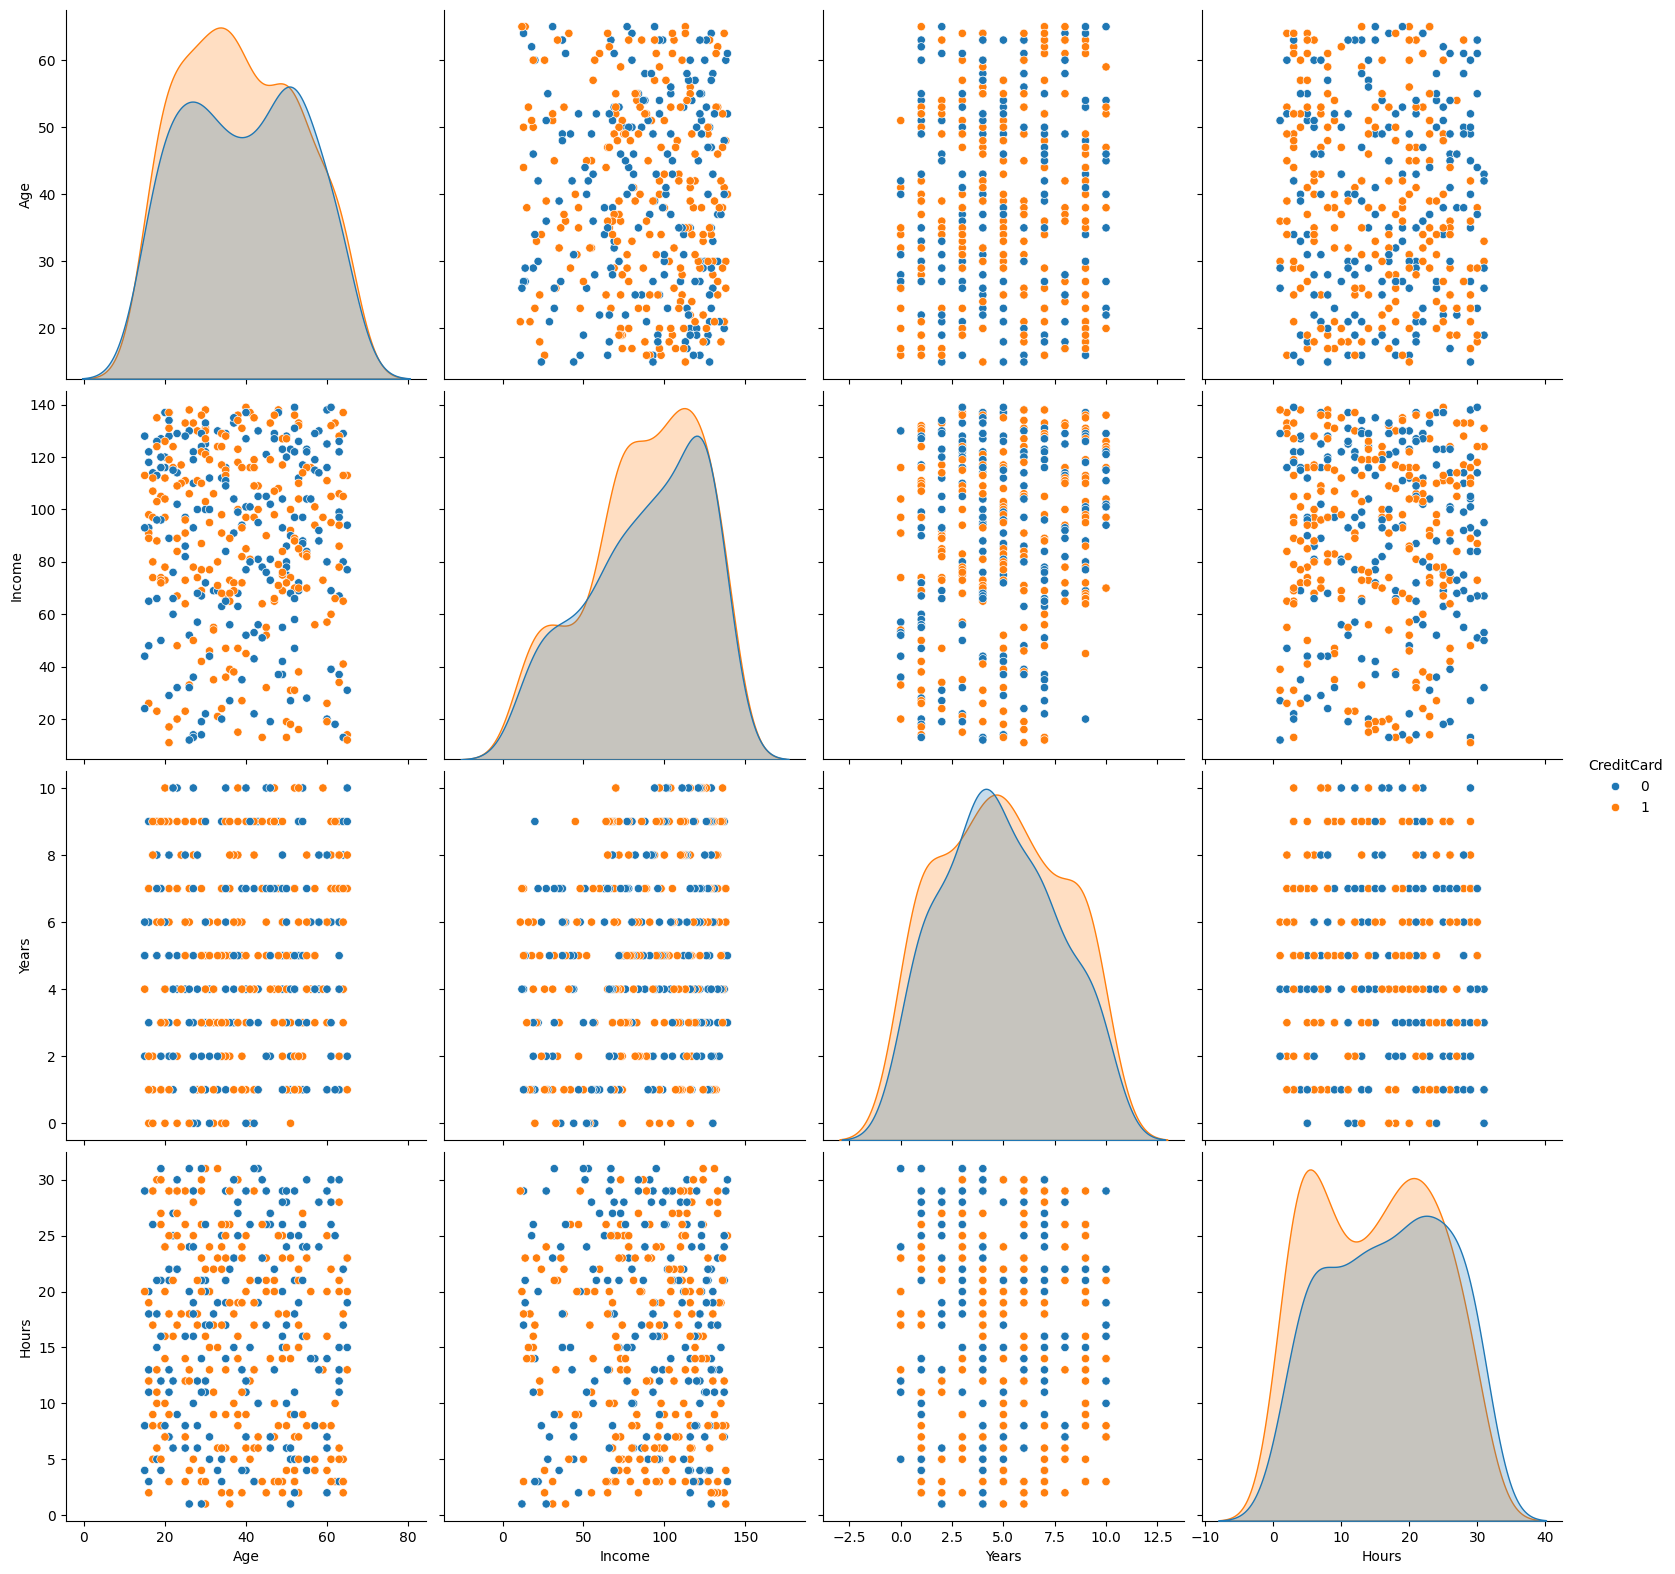

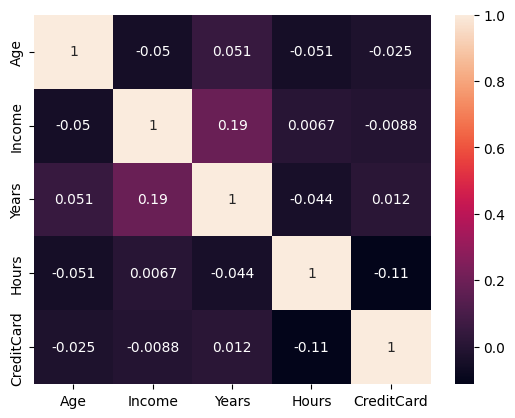

In [ ]:
nxl='/content/3. BD2_In_App_Pur_L_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['Age','Income','Years','Hours','CreditCard']]
display(XDB)

#Para mirar correlaciones y variables importantes
plt.figure
sns.pairplot(XDB,hue='CreditCard',size=4, vars=['Age','Income','Years','Hours'])
plt.show()

#¿Cuáles son las correlaciones?
plt.figure
sns.heatmap(XDB.corr(),annot=True)
plt.show()


2. Se procede con la implementación del modelo de Clusterización

In [ ]:
XD=XDB[['Age','Income','Years','Hours']]
yd=XDB['CreditCard']

#Se van a crea 5 montoncitos de datos (Perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n",centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NApr=XDB.groupby('labels').agg({"CreditCard":lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({"CreditCard":lambda x:(x==0).sum()})
print("El número de aprobados por cluster es:\n",NApr)
print("El número de negados por cluster es:\n",NNeg)

#Se procede con la estimación de los porcentajes de preaprobación
NApr['CreditCard']=NApr['CreditCard']/ND
NNeg['CreditCard']=NNeg['CreditCard']/ND
print("El porcentaje de aprobados por cluster es:\n",NApr)
print("El porcentaje de negados por cluster es:\n",NNeg)

Los centroides son:
 [[ 41.42622951  26.57377049   3.80327869  14.85245902]
 [ 41.69565217 126.08695652   4.99130435  15.40869565]
 [ 25.19178082 104.45205479   5.43835616  18.47945205]
 [ 52.28915663  85.14457831   5.3373494   14.89156627]
 [ 31.77941176  63.35294118   4.29411765  16.19117647]]


,Age,Income,Years,Hours,CreditCard,labels
0,40,139,3,25,1,1
1,26,138,7,4,1,1
2,48,138,7,8,1,1
3,60,138,6,29,0,1
4,21,137,5,21,0,1
...,...,...,...,...,...,...
395,36,65,8,2,1,4
396,64,65,7,18,1,3
397,35,65,7,21,0,4
398,25,64,9,3,1,4


El tamaño de los clusters es:
 [ 61 115  73  83  68]
El número de aprobados por cluster es:
         CreditCard
labels            
0               32
1               62
2               37
3               43
4               39
El número de negados por cluster es:
         CreditCard
labels            
0               29
1               53
2               36
3               40
4               29
El porcentaje de aprobados por cluster es:
         CreditCard
labels            
0         0.524590
1         0.539130
2         0.506849
3         0.518072
4         0.573529
El porcentaje de negados por cluster es:
         CreditCard
labels            
0         0.475410
1         0.460870
2         0.493151
3         0.481928
4         0.426471


3. Se procede a evaluar el modelo (matriz de confusión)

In [ ]:
ydp=np.zeros((len(XD),1))
Vapr=np.array(NApr);Vneg=np.array(NNeg)


for k in range(len(XD)):
  napr=labels[k]

  print("La persona tal:",k)
  print("El cluster al que pertenece es:",napr)
  print("El porcentaje de Aprobación es:",Vapr[napr])
  print("El porcentaje de Rechazo es:",Vneg[napr])
  #Consolidamos la información de los Aprobados y Negados
  if Vapr[napr]>=Vneg[napr]:
    ydp[k]=1
  else:
    ydp[k]=0




La persona tal: 0
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 1
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 2
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 3
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 4
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 5
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 6
El cluster al que pertenece es: 1
El porcentaje de Aprobación es: [0.53913043]
El porcentaje de Rechazo es: [0.46086957]
La persona tal: 7
El cluste

4. Se procede a evaluar el modelo

In [ ]:
#Se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VP=cm[1,1]
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]


sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:",sensibilidad)
especificidad=VN/(VN+FP)
print("La especificidad del modelo es:",especificidad)

exactitud=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es:",exactitud)
sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:",sensibilidad)
especificidad=VN/(VN+FP)
print("La especificidad del modelo es:",especificidad)
precision=VP/(VP+FP)
print("La precisión del modelo es:",precision)
TasaError=(FP+FN)/(VP+VN+FP+FN)
print("La tasa de error del modelo es:",TasaError)
PredNeg=VN/(VN+FN)
print("La tasa de predicción negativa del modelo es:",PredNeg)

La matriz de confusión es:
 [[  0 187]
 [  0 213]]
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0
La exactitud del modelo es: 0.5325
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0
La precisión del modelo es: 0.5325
La tasa de error del modelo es: 0.4675
La tasa de predicción negativa del modelo es: nan


<ipython-input-16-03e93e13ddf2>:25: RuntimeWarning: invalid value encountered in scalar divide
  PredNeg=VN/(VN+FN)


**Analisis de Resultados**



In [ ]:
XDn=([(40,127,5,4)])
ydn=mkm.predict(XDn)
print("La persona pertenece al cluster:", mkm.predict(XDn))
print("El porcentaje de Aprobación es:",Vapr[ydn])
print("El porcentaje de Rechazo es:",Vneg[ydn])


La persona pertenece al cluster: [1]
El porcentaje de Aprobación es: [[0.53913043]]
El porcentaje de Rechazo es: [[0.46086957]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Llevar a cabo el pronóstico de las personas que se ubican en la Hoja 2 del archivo de los datos.

In [ ]:
XDB0 = pd.read_excel(nxl, sheet_name=1)
XDB0.head(100)

# Crea la base de datos a pronosticar
XD0 = XDB0[['Age','Income','Years','Hours']]
yd0 = XDB0[['CreditCard']]

# Changed 'mar' to 'mkm' to use the fitted KMeans model

# Le calculamos la preaprobación a los solicitantes
y_pred = mkm.predict(XD0)
print(y_pred)

# Se crea el informe en Excel
df = pd.DataFrame(np.column_stack((XD0, y_pred)))  # No se necesita filas, ya que se usan todas las filas.
df.columns = ['Age','Income','Years','Hours', 'CreditCard']
df.to_excel('Predicciones.xlsx')

[1 1]


# Análisis de Resultados

Para la clasificación de datos mediante el método de clusterización, se tomaron un total de 4 variables socioeconómicas de entrada:'Age','Income','Years','Hours', 'CreditCard. La variable explicativa utilizada fue la posesión de una tarjeta de crédito (Credit Card).

Se identificó que la variable con mayor relación respecto a la posesión de una tarjeta de crédito (Credit Card) fue Income (Ingresos), con una correlación significativa. Asimismo, se encontró que Income y Years presentaron la correlación más alta entre variables de entrada, lo que indica que a mayores ingresos, mayor cantidad de años con la tarjeta de crédito.

El cluster con los mayores ingresos fue el cluster 1, en donde el porcentaje de aprobación de tarjetas de crédito alcanzó el 53.91%, lo que refuerza la importancia del ingreso en la decisión de aprobación.

Por otro lado, el cluster con los menores ingresos fue el cluster 0, en donde el porcentaje de aprobación se ubicó en 52.45%. Esto indica que, aunque el ingreso es un factor importante, existen otros elementos que pueden influir en la decisión final.

En cuanto a la variable Hours, se identificó que el cluster con el mayor promedio de horas fue el cluster 2, con 18.48 horas en promedio, mientras que el cluster con la menor cantidad de años con tarjeta de crédito fue el cluster 0, con 3.80 años.

El modelo alcanzó una exactitud de 53.25%, lo que indica un desempeño moderado en la clasificación de los datos. En términos de la aprobación de tarjetas de crédito, el modelo logró una sensibilidad del 100%, lo que significa que identificó correctamente a todas las personas que poseen una tarjeta de crédito. Sin embargo, la especificidad fue del 0%, lo que indica que el modelo no logró identificar correctamente a las personas que no poseen una tarjeta.


